<a href="https://colab.research.google.com/github/Raidin/DeepLearningReserach/blob/remind_basic_skill/vanishing_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradient Vanishing
* Gradient Vanishing은 Neural Network 학습을 위해 Back Propagation 중에 Gradient값이 소멸(기울기 값이 0) 되어 더이상 weight값이 업데이트 되지 않는 현상
* 학습시 사용 되는 활성화 함수(Activation Function)중 Sigmoid 계열의 함수를 사용 했을 때, 자주 발생되는 문제

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def EachFunctinDraw(*args) :
    plt.figure(figsize=(5, 5))

    plt.plot(x, args[1], label=args[0], linewidth='1.0', linestyle="-")

    plt.grid(True)
    plt.title(args[0])
    plt.legend(loc='upper left')

    '''
    Equation Display
    '''
    plt.text(0.2, 0.2, args[2], fontsize=15)

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    plt.show()

In [0]:
def MergeFunctionDraw(title, x, **y):
    plt.figure(figsize=(5, 5))

    for key, value in y.items():
        plt.plot(x, value, label=key, linewidth='1.0', linestyle="-")

    plt.grid(True)
    plt.title(title)
    plt.legend(loc='upper left')

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    plt.show()

In [0]:
def Sigmoid(x, prime=False):
    if prime:
        return Sigmoid(x) * (1 - Sigmoid(x))
    else:
        return 1 / (1 + np.exp(-x))

def Tanh(x, prime=False):
    if prime:
        return 1 - pow(Tanh(x),2)
    else:
        return 2 * Sigmoid(2 * x) - 1

def Relu(x, prime=False):
    if prime:
        return np.maximum(0, np.abs(x)/(x + 1e-8))
    else:
        return np.maximum(x, 0)

def LeakyRelu(x, prime=False):
    if prime:
        return np.maximum(0.01, np.abs(x)/(x+1e-8))
    else:
        return np.maximum(0.01*x, x)

def ELU(x, prime=False):
    alpha = 1
    if prime:
        return np.where(x>0,  x/(x+1e-8), np.exp(x) * alpha)
    else:
        return np.where(x>0, x, (np.exp(x) - 1) * alpha)


In [0]:
def SampleNetwork(activation_func) :
    linear_range = 100;
    x = np.linspace(-4, 4, linear_range, True)

    '''
    <Notice>
    Weight : 1, Bias : 0 이라고 가정하여 연산에 포함하지 않음
    '''
    # Forward
    forward = dict()
    for i in range(layer_range):
        data = x if i == 0 else forward['layer-{}'.format(i)]
        forward['layer-{}'.format(i+1)] = activation_func(data)

    MergeFunctionDraw('Forward', x, **forward)

    # Backward
    backward = dict()
    for i in range(layer_range, 0,-1):
        backward['layer-{}'.format(i)] = x if i - 1== 0 else forward['layer-{}'.format(i - 1)]
        for j in range(i-1, layer_range):
            data = x if j== 0 else forward['layer-{}'.format(j)]
            backward['layer-{}'.format(i)] *= activation_func(data, True)

    x = np.linspace(-20, 20, 100, True)
    MergeFunctionDraw('Backward', x, **backward)

In [0]:
def DerivativePerLayer(activation_func):
    x = np.linspace(-4, 4, 100, True)
    out = dict()

    previous = np.ones_like(x, dtype='float64')
    for i in range(layer_range, 0, -1):
        out['layer-{}'.format(i)] = previous * activation_func(x, True)
        previous = out['layer-{}'.format(i)]

    MergeFunctionDraw('Derivative Per Layer', x, **out)

# **Sigmoid 함수 Gradient Vanishing 원인**
---
* Sigmoid 함수를 그래프로 표기하면 아래와 같다. Sigmoid를 미분하면 최대 값이 0.25라는 것을 알 수있다.
* 즉, 네트워크 망이 깊어 질 수록 Gradient(기울기)가 0.25(1/4)만큼 줄어든다는 의미이다.
* 망이 깊어 질수록 기울기가 계속해서 줄어든다면, 아주 Deep한 네트워크에서 Sigmoid 함수를 활성화 함수로 사용 할 경우 Gradient값이 0이 되는 문제가 생긴다.
* ### Forward 상황에서  문제점
  * Activation Function으로 Sigmoid를 사용 하여 Forward를 반복할 경우, 출력 값이 수렴

* ### Backward 상황에서 문제점
  * layer층이 깊어 질수록 급격하게 Gradient(기울기)값이 감소 --> 하위 Layer로 갈 수록 1/4(0.25)만큼 감소

---

# Example
* 3개의 Hidden Layer를 가지는 신경망 구조 사용

![network](https://docs.google.com/uc?export=download&id=1eraxPXZqhRIN6egtrQ0SjH4qA67vZoSk)

* 위 네트워크에서 각 wieght값의 Error에 대한 기울기(변화량)은 아래의 수식과 같이 계산 할 수 있다.

![backpropagation](https://docs.google.com/uc?export=download&id=1GW7eupKr-WdJvVeZ3zDNQ0i1z7WYUVVB)

* 총 5개(Sigmoid, Tanh, Relu, LeakyRelu, ELU) Activation Function에 대해서 Forward, Backward 결과 및 각 Layer단계별 Back probagation 하였을때 Activation 미분값 계산

* Sigmoid를 제외한 나머지 Activation 함수에서는 layer층이 많아지더라도 기울기 값이 소멸되지 않는 것을 확인 할 수 있다.
* 단, Tanh의 경우, 기울기 값은 소멸하지 않지만 입력 값에 절대 값을 취했을때, 0으로 수렴하는 부분이 있어 여전히 Vanishing Gradient의 문제는 남아 있다.

[Reference](https://ayearofai.com/rohan-4-the-vanishing-gradient-problem-ec68f76ffb9b)



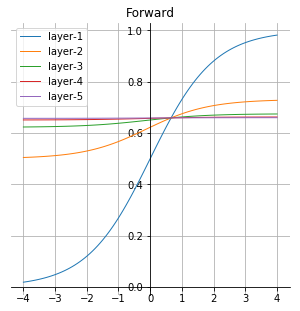

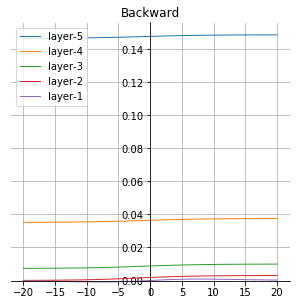

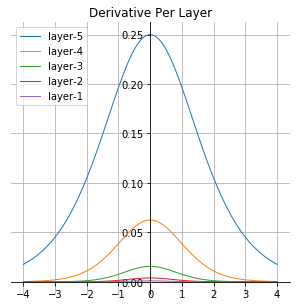

In [125]:
layer_range = 5

# Sigmoid 함수
SampleNetwork(Sigmoid)
DerivativePerLayer(Sigmoid)

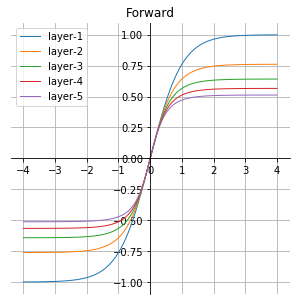

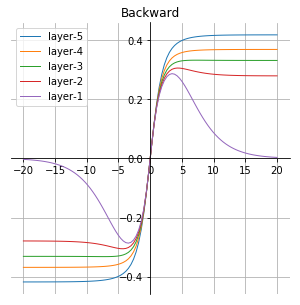

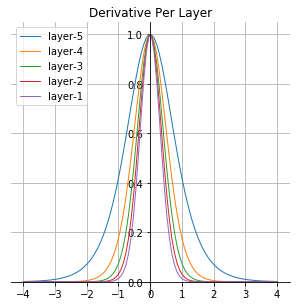

In [126]:
# Tanh 함수
SampleNetwork(Tanh)
DerivativePerLayer(Tanh)

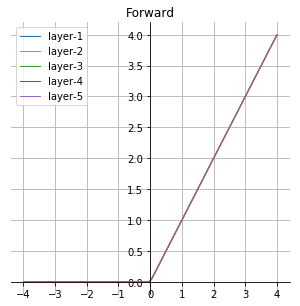

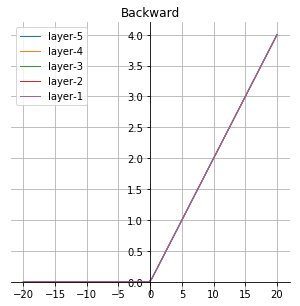

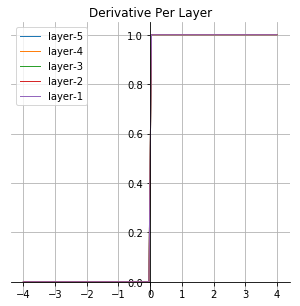

In [127]:
# Relu 함수
SampleNetwork(Relu)
DerivativePerLayer(Relu)

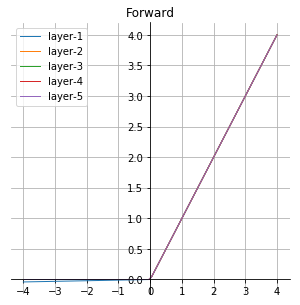

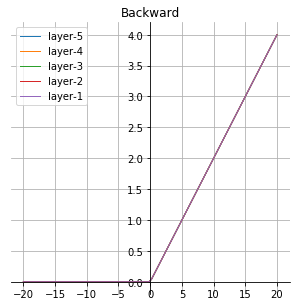

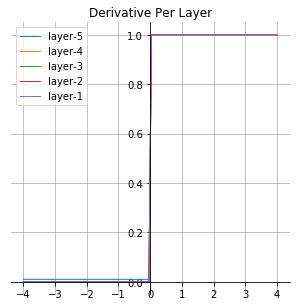

In [128]:
# Leaky Relu 함수
SampleNetwork(LeakyRelu)
DerivativePerLayer(LeakyRelu)

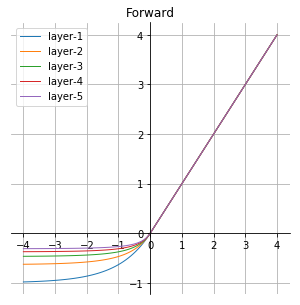

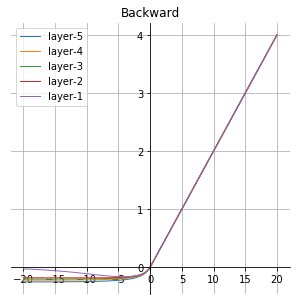

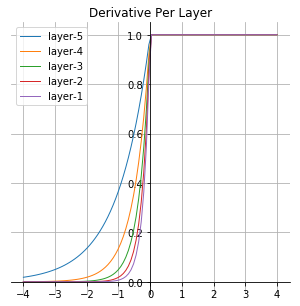

In [129]:
# ELU 함수
SampleNetwork(ELU)
DerivativePerLayer(ELU)